# Crowdfunding Visual Data Analysis

# Table of contents
1. [Introduction](#introduction)
2. [Descriptive Statistics](#descriptivestatistics)
3. [Univariate Exploration](#univariateexploration)

# Introduction <a name="introduction"></a>
Some introduction text, formatted in heading 2 style


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# style settings
# uncoment the below to avoid collapsing of dataframes
# pd.set_option('display.max_rows', 2500)
# pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,}'.format

## Launch data and prepare for analysis

In [2]:
file_name =  './data/kickstarter_master{}.csv'
master_df = pd.concat([pd.read_csv(file_name.format(i)) for i in range(1,4)])
master_df.reset_index(drop=True, inplace=True)
master_df.head()

,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,...,staff_pick,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
0,3707841,Pobasso and the Cucumbers - Historical Musical for Schools,https://www.kickstarter.com/projects/pobasso/pobasso-and-the-cucumbers-historical-musical-for-s,"School Musical, set 300 years ago, focusing on the cultural and relationship between the Aboriginal people and the Macassan Fishermen",Art,Performance Art,https://ksr-ugc.imgix.net/assets/024/717/542/6be468560e102332cdb781dc53aa39e2_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1554855643&auto=format&frame=1&q=92&s=370a1902aa4d134c25eeae0238fe7868,pobasso-and-the-cucumbers-historical-musical-for-s,2019-04-10 00:00:39,2019-04-18 04:49:38,...,False,AUD,"3,500.0","2,418.7221119841747","2,406.722637170395",0.0,0.0,0.0,1.4470451081,1.4542598079
1,3703851,U R invited 2 A Funk Show for Mommy's 41st,https://www.kickstarter.com/projects/2creativegabe/u-r-invited-2-a-funk-show-for-mommys-41st,"""Don't Stop"" and Frankie Hernandez Band at the Band Shell in Ashland, Oregon 4/28 1PM-3PM",Music,World Music,https://ksr-ugc.imgix.net/assets/024/815/131/12ed907202f85c26d3659cb188005010_original.png?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1555561655&auto=format&frame=1&q=92&s=1907fe22541e94b905bb2f85b40a9d89,u-r-invited-2-a-funk-show-for-mommys-41st,2019-04-04 12:23:13,2019-04-18 04:37:08,...,False,USD,"2,000.0","2,000.0","2,000.0",0.0,0.0,0.0,1.0,1.0
2,3547680,The third generation of amphibious six-wheel tumbling car,https://www.kickstarter.com/projects/1601343788/the-third-generation-of-amphibious-six-wheel-tumbl,The third generation of amphibious six-wheel remote control tumbling car,Technology,Hardware,https://ksr-ugc.imgix.net/assets/023/718/126/8ea2e08d17bc81aa7d7d1b18c38ef075_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1546849358&auto=format&frame=1&q=92&s=69a478eb7656f09de808339109ca512f,the-third-generation-of-amphibious-six-wheel-tumbl,2019-01-06 02:50:54,2019-04-18 04:06:36,...,False,HKD,"10,000.0","1,275.026584497772","1,274.1352488994912",0.0,0.0,0.0,7.842973724299999,7.8484603645
3,3524160,Star Wars: Dawn of the Chase,https://www.kickstarter.com/projects/thechase/star-wars-dawn-of-the-chase,"A prequel to Star Wars: The Chase. It holds intense lightsaber fights, a to be tragic friendship, and fun for Star Wars fans everywhere",Film & Video,Science Fiction,https://ksr-ugc.imgix.net/assets/023/403/716/a1a90cba3b7f5d54f015835f74436550_original.JPG?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1543362495&auto=format&frame=1&q=92&s=8ed4c9a9727712e3acd2818c910637f5,star-wars-dawn-of-the-chase,2018-11-27 23:43:25,2019-04-18 03:39:51,...,False,USD,"7,000.0","7,000.0","7,000.0",1.0,1.0,1.0,1.0,1.0
4,3706839,Magick Charms! A unique witchy pin Kickstarter,https://www.kickstarter.com/projects/fernwehfreya/magick-charms-a-unique-witchy-pin-kickstarter,Unique charms made into pins to bring you luck and magick.,Art,Digital Art,https://ksr-ugc.imgix.net/assets/024/814/435/1bc5c4fa965a12c2e5d4329256a10689_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1555556537&auto=format&frame=1&q=92&s=54a2e7906c01ef539673012b479192cf,magick-charms-a-unique-witchy-pin-kickstarter,2019-04-08 20:00:58,2019-04-18 03:37:10,...,False,USD,300.0,300.0,300.0,0.0,0.0,0.0,1.0,1.0


In [3]:
# Create a separate data frame for completed project only
ks_compl = master_df.query('(status == "successful") | (status == "failed")')
ks_compl.reset_index(drop=True, inplace=True)
ks_compl.status.value_counts()

successful    95451
failed        74210
Name: status, dtype: int64

In [4]:
# To category
master_df['country'] = master_df['country'].astype('category')
master_df['currency'] = master_df['currency'].astype('category')
master_df['status'] = master_df['status'].astype('category')
master_df['category'] = master_df['category'].astype('category')
master_df['subcategory'] = master_df['subcategory'].astype('category')

# to date time
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']] = master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']].apply(pd.to_datetime)

In [5]:
# engineer variable to asses funding duration
master_df['duration'] = master_df['deadline'] - master_df['launched_at']
master_df[['launched_at', 'deadline', 'duration']].sample(10)

,launched_at,deadline,duration
151750,2014-05-25 19:00:16,2014-06-24 19:00:16,30 days 00:00:00
92770,2016-01-06 23:35:58,2016-02-05 23:35:58,30 days 00:00:00
180484,2011-04-29 01:02:12,2011-05-29 01:02:12,30 days 00:00:00
78742,2016-06-16 01:20:59,2016-07-16 01:20:59,30 days 00:00:00
59359,2017-03-15 22:29:16,2017-05-14 22:29:16,60 days 00:00:00
165396,2013-04-26 18:18:43,2013-05-20 09:00:00,23 days 14:41:17
66727,2016-11-30 16:48:56,2016-12-30 16:00:00,29 days 23:11:04
42981,2017-10-18 21:06:55,2017-11-20 22:06:55,33 days 01:00:00
152856,2014-05-07 16:17:32,2014-06-06 16:17:32,30 days 00:00:00
17469,2018-09-26 03:10:02,2018-10-26 03:10:02,30 days 00:00:00


In [6]:
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at', 'duration']].head()

,created_at,launched_at,state_changed_at,deadline,last_update_at,duration
0,2019-04-10 00:00:39,2019-04-18 04:49:38,2019-04-18 04:49:38,2019-06-02 04:49:38,2019-04-10 00:00:39,45 days 00:00:00
1,2019-04-04 12:23:13,2019-04-18 04:37:08,2019-04-18 04:37:08,2019-05-08 04:37:08,2019-04-04 12:23:13,20 days 00:00:00
2,2019-01-06 02:50:54,2019-04-18 04:06:36,2019-04-18 04:06:36,2019-06-17 04:06:36,2019-01-06 02:50:54,60 days 00:00:00
3,2018-11-27 23:43:25,2019-04-18 03:39:51,2019-04-18 03:39:52,2019-06-02 03:39:51,2018-11-27 23:43:25,45 days 00:00:00
4,2019-04-08 20:00:58,2019-04-18 03:37:10,2019-04-18 03:37:11,2019-05-20 16:11:00,2019-04-08 20:00:58,32 days 12:33:50


In [7]:
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at', 'duration']].tail()

,created_at,launched_at,state_changed_at,deadline,last_update_at,duration
182818,2009-04-22 02:11:10,2009-05-01 15:44:25,2009-06-05 07:00:24,2009-06-05 06:59:00,2015-03-09 15:43:20,34 days 15:14:35
182819,2009-05-01 11:38:34,2009-05-01 12:22:21,2009-05-31 11:45:17,2009-05-31 11:38:00,2015-03-09 15:43:20,29 days 23:15:39
182820,2009-04-29 19:52:44,2009-04-29 21:11:15,2009-06-15 19:00:31,2009-06-15 19:00:00,2015-03-09 15:43:20,46 days 21:48:45
182821,2009-04-29 16:40:26,2009-04-29 20:08:13,2009-07-04 16:45:20,2009-07-04 16:40:00,2015-03-09 15:43:20,65 days 20:31:47
182822,2009-04-27 04:44:17,2009-04-28 11:55:41,2009-05-16 10:00:25,2009-05-16 09:59:00,2015-03-09 15:43:20,17 days 22:03:19



# Descriptive Statistics <a name="descriptivestatistics"></a>
Some introduction text, formatted in heading 2 style

In [8]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182823 entries, 0 to 182822
Data columns (total 34 columns):
project_id                 182823 non-null int64
project_name               182823 non-null object
url                        182823 non-null object
blurb                      182823 non-null object
category                   182823 non-null category
subcategory                182823 non-null category
image                      182823 non-null object
slug                       182823 non-null object
created_at                 182823 non-null datetime64[ns]
launched_at                182823 non-null datetime64[ns]
deadline                   182823 non-null datetime64[ns]
state_changed_at           182823 non-null datetime64[ns]
last_update_at             182823 non-null datetime64[ns]
status                     182823 non-null category
creator_id                 182823 non-null int64
creator_name               182822 non-null object
country                    182814 non-null ca

In [9]:
master_df[master_df.creator_name.isna()]

,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,...,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd),duration
93242,2298709,Cannabis Colouring Book,https://www.kickstarter.com/projects/498969171/cannabis-colouring-book,"A Cannabis Colouring Book, 20 black and white prints by a Fine Artist",Art,Conceptual Art,https://ksr-ugc.imgix.net/assets/012/342/732/d13264538144cbd88347a1b50579e6e4_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463756060&auto=format&frame=1&q=92&s=34c74564f1ce4b2795e93c1644d68674,cannabis-colouring-book,2015-12-31 05:21:47,2015-12-31 18:31:24,...,USD,"2,500.0","2,500.0","2,500.0",4.2,4.2,4.2,1.0,1.0,30 days


In [10]:
projects_unique = master_df.project_id.nunique()
projects_unique

182823

In [11]:
creators_unique = master_df.creator_id.nunique()
creators_unique

157731

In [12]:
master_df.describe()

,project_id,creator_id,backers_count,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd),duration
count,"182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0",182823
mean,"2,134,008.0534013775","1,074,355,687.692052",133.19608036188006,"53,045.47494396218","43,448.078089024704","44,479.11088315567","15,576.358262472442","11,401.910574973052","11,564.410448010885",1.485224279454205,1.4551578997548096,32 days 22:02:49.007400
std,"1,067,350.4118824806","620,008,225.0301064",872.1391095687884,"1,253,273.100861694","1,136,140.0580206462","1,171,775.8831360221","276,843.9582965485","83,287.45359229682","83,809.367465106",4.607852686752006,4.643109675852995,11 days 21:28:52.920434
min,19.0,3.0,0.0,0.01,0.01,0.01,0.0,0.0,0.0,0.7953815801,0.5826048629999999,1 days 00:00:00
25%,"1,316,340.0","537,632,655.5",3.0,"1,500.0","1,500.0","1,500.0",72.0,69.0,70.0,1.0,1.0,29 days 23:00:00
50%,"2,256,628.0","1,073,325,885.0",23.0,"5,000.0","5,000.0","5,000.0","1,252.0","1,215.0","1,243.026457903441",1.0,1.0,30 days 00:00:00
75%,"3,087,906.5","1,611,913,230.5",80.0,"15,000.0","13,460.474423241045","14,219.6926569536","6,061.145","5,737.0","5,853.187935164977",1.0,1.0,35 days 00:00:00
max,"3,713,426.0","2,147,483,434.0","105,857.0","100,000,000.0","125,725,818.27633902","150,099,318.94817606","81,030,744.0","10,441,174.430000003","10,441,174.430000003",108.7525782441,113.9401218152,93 days 02:32:04


In [13]:
ks_compl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169661 entries, 0 to 169660
Data columns (total 33 columns):
project_id                 169661 non-null int64
project_name               169661 non-null object
url                        169661 non-null object
blurb                      169661 non-null object
category                   169661 non-null object
subcategory                169661 non-null object
image                      169661 non-null object
slug                       169661 non-null object
created_at                 169661 non-null object
launched_at                169661 non-null object
deadline                   169661 non-null object
state_changed_at           169661 non-null object
last_update_at             169661 non-null object
status                     169661 non-null object
creator_id                 169661 non-null int64
creator_name               169660 non-null object
country                    169652 non-null object
city                       169661 non-nul

In [14]:
ks_compl.describe()

,project_id,creator_id,backers_count,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
count,"169,661.0","169,661.0","169,661.0","169,661.0","169,661.0","169,661.0","169,661.0","169,661.0","169,661.0","169,661.0","169,661.0"
mean,"2,097,847.673101066","1,074,553,844.7647839",139.4416453987658,"48,338.23065454052","39,941.958284471446","40,906.12771538828","16,294.199502949998","11,900.157980740078","12,072.580720515753",1.4671463163213272,1.4372048803947688
std,"1,062,316.3575661338","620,419,164.9990015",878.2222230108724,"1,157,597.3884318992","1,070,765.960723602","1,106,030.4164593664","286,000.15451520256","82,136.039850619","82,701.06921244746",4.540718606962782,4.575029801337384
min,19.0,3.0,0.0,0.01,0.01,0.01,0.0,0.0,0.0,0.7953815801,0.5826048629999999
25%,"1,274,156.0","536,587,459.0",3.0,"1,500.0","1,500.0","1,500.0",100.0,100.0,100.0,1.0,1.0
50%,"2,220,164.0","1,073,975,101.0",26.0,"5,000.0","5,000.0","5,000.0","1,498.0","1,423.5708476952734","1,471.0",1.0,1.0
75%,"3,047,911.0","1,612,919,392.0",85.0,"15,000.0","12,572.581827633903","13,193.87635772584","6,460.0","6,158.0","6,256.0",1.0,1.0
max,"3,705,509.0","2,147,483,434.0","105,857.0","100,000,000.0","125,725,818.27633902","150,099,318.94817606","81,030,744.0","8,596,474.58","8,596,474.58",108.7525782441,113.9401218152


In [15]:
n_compl_projects = ks_compl.project_id.nunique()
n_compl_projects

169661

### Project success

In [16]:
master_df.status.value_counts()

successful    95451
failed        74210
canceled      8587 
live          3945 
suspended     630  
Name: status, dtype: int64

In [17]:
n_success = len(master_df[master_df.status == "successful"])
n_failed = len(master_df[master_df.status == "failed"])
n_live = len(master_df[master_df.status == "live"])
n_canceled = len(master_df[master_df.status == "canceled"])
n_suspended = len(master_df[master_df.status == "suspended"])

In [18]:
# all projects
p_success = n_success / projects_unique
p_failed = n_failed / projects_unique
p_live = n_live / projects_unique 
p_canceled = n_canceled / projects_unique
p_suspended = n_suspended / projects_unique
print("Success: {}%".format(round(p_success*100,2)))
print("Failed: {}%".format(round(p_failed*100, 2)))
print("Canceled: {}%".format(round(p_canceled*100, 2))) 
print("Live: {}%".format(round(p_live*100, 2)))
print("Suspended: {}%".format(round(p_suspended*100, 2))) 

Success: 52.21%
Failed: 40.59%
Canceled: 4.7%
Live: 2.16%
Suspended: 0.34%


In [19]:
# completed projects
n_compl_success = len(ks_compl[ks_compl.status == "successful"])
n_compl_fail = len(ks_compl[ks_compl.status == "failed"])
p_compl_success = n_compl_success / n_compl_projects
p_compl_fail = n_compl_fail / n_compl_projects
print("Success: {}%".format(round(p_compl_success*100,2)))
print("Failed: {}%".format(round(p_compl_fail*100, 2)))


Success: 56.26%
Failed: 43.74%


### Creators

In [20]:
# how many prFind ojects do people usually start?
n_compl_creators_unique = ks_compl.creator_id.nunique()
n_compl_creators_unique

147269

In [21]:
power_users = (ks_compl['creator_id'].value_counts()
        .reset_index()
        .rename(index=str, columns={"creator_id": "project_count"})['project_count']
        .value_counts()
        .reset_index()
        .rename(index=str, columns={"index": "project_count", "project_count": "creator_count"})
        .sort_values(by='project_count', ascending=False))

power_users

,project_count,creator_count
35,70,1
32,58,1
26,52,1
27,36,1
28,34,1
29,33,1
25,32,1
31,31,1
24,30,2
23,27,2


In [22]:
creators_ordered = ks_compl.creator_id.value_counts().index
creators_ordered

Int64Index([2104052526,  957058942,  978911160, 1323060510, 1655558466,
            2039317553,  578114575,  863477191, 1229765692,   63602967,
            ...
             919528270, 1963641068, 2053489515,  687209324, 1377956717,
            1473375086, 1278544754,    1127285, 1654849949, 1221978673],
           dtype='int64', length=147269)

In [23]:
# most active user - most projects
print(f"username: {ks_compl[ks_compl.creator_id == creators_ordered[0]]['creator_name'].iloc[0]}")
ks_compl[ks_compl.creator_id == creators_ordered[0]]

username: Collectable Playing Cards


,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,...,staff_pick,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
7690,3504998,Bicycle Stained Glass Leviathan Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-stained-glass-leviathan-playing-cards,The Leviathan Sea Monster takes form as the 3rd edition in the Stained Glass Series.,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/023/106/899/546300f9aaa4639b67d4f1c1fdf613c4_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1541093879&auto=format&frame=1&q=92&s=1b23fe9f9f96f9682cc5cbe6b6d432e7,bicycle-stained-glass-leviathan-playing-cards,2018-11-01 17:36:54,2018-11-26 19:35:05,...,False,USD,"4,000.0","4,000.0","4,000.0","13,687.0","13,687.0","13,687.0",1.0,1.0
11684,3372265,BICYCLE MARBLE Playing Cards by Max,https://www.kickstarter.com/projects/2104052526/bicycle-marble-playing-cards-by-max,The NEW GENERATION of the TEXTURE SERIES by Max (Max Playing Cards),Games,Playing Cards,https://ksr-ugc.imgix.net/assets/021/478/957/e96e0d3d393a63dacfd7e344d129c6ef_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1528219862&auto=format&frame=1&q=92&s=6209fd92d37889a1b6fa54e1c2b2d4c3,bicycle-marble-playing-cards-by-max,2018-05-02 15:11:24,2018-10-10 15:09:57,...,False,USD,"13,000.0","13,000.0","13,000.0","10,612.0","10,612.0","10,612.0",1.0,1.0
13023,3460006,Bicycle Limited Edition Bald Eagle Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-limited-edition-bald-eagle-playing-cards,"The emblem bird of the United States The Bald Eagle, is now a limited edition Bicycle playing card deck. Only 1100 decks will printed.",Games,Playing Cards,https://ksr-ugc.imgix.net/assets/022/396/885/5ff1a0277e1888ba564c60ced85a6e79_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1535652459&auto=format&frame=1&q=92&s=2d6e0c095b7076b751b578a6e9c6a2b5,bicycle-limited-edition-bald-eagle-playing-cards,2018-08-30 18:06:23,2018-09-25 18:01:14,...,False,USD,"3,000.0","3,000.0","3,000.0","3,523.0","3,523.0","3,523.0",1.0,1.0
15224,3455599,Bicycle Explostar Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-cardistry-explostar-playing-cards,Collectable Playing Cards first Cardistry deck is ready and set to explode onto the scene!,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/022/434/593/3614340c9b7ee19263c6e965308a0a49_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1536003495&auto=format&frame=1&q=92&s=26a8eb63300ff6bfade972d51951e06a,bicycle-cardistry-explostar-playing-cards,2018-08-24 17:34:07,2018-08-30 16:18:25,...,False,USD,"4,000.0","4,000.0","4,000.0","4,755.0","4,755.0","4,755.0",1.0,1.0
16640,3427450,Bicycle Limited Edition Gyrfalcon Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-limited-edition-gyrfalcon-playing-cards,The largest falcon in the world now a limited edition Bicycle playing cards deck. Only 1100 decks will be printed.,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/021/929/296/8d2e381918b619c18c29c95aa4b644fd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1533147729&auto=format&frame=1&q=92&s=70452f0ae9587e62d6e39ad6ca6452b3,bicycle-limited-edition-gyrfalcon-playing-cards,2018-07-17 17:46:30,2018-08-10 16:07:32,...,False,USD,"2,500.0","2,500.0","2,500.0","9,533.0","9,533.0","9,533.0",1.0,1.0
21416,3393416,Bicycle Antiques Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-antiques-playing-cards,Travel back in time with the Bicycle Antiques Deck,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/021/410/331/381c47b3818858487e85c739bf52bce6_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1527704269&auto=format&frame=1&q=92&s=abf9a7ec8eb63b29cc414553a2bea5d9,bicycle-antiques-playing-cards,2018-05-30 18:17:26,2018-06-08 17:58:10,...,False,USD,"5,000.0","5,000.0","5,000.

User with most projects is "Collectable Playing Cards" who is funding Bicycle themed playing cards. 

### Goals

In [24]:
ks_compl.sort_values('goal_hist_usd')['goal_hist_usd']

169534   0.01                
3789     0.7110381409261841  
50306    0.7369635440941191  
19850    0.7416028844171938  
61752    0.7431141090408384  
56403    0.7460631311337005  
105407   0.7469115192248001  
56556    0.7474269819047373  
111798   0.7577737881498067  
93139    0.7614247221788767  
67641    0.7643925425169484  
16680    0.7737711390544646  
69694    0.7779700914052177  
36393    0.7789306721568847  
120325   0.8150895482519146  
108996   0.8262278182991489  
22289    0.8893666439518404  
23630    0.915625624855996   
20452    1.0                 
135511   1.0                 
166720   1.0                 
91064    1.0                 
74214    1.0                 
96079    1.0                 
144271   1.0                 
100312   1.0                 
158909   1.0                 
135589   1.0                 
158852   1.0                 
20725    1.0                 
          ..                 
69887    30,000,000.0        
44863    33,000,000.0        
97345    4

In [25]:
# projects of highest ad lowest goals
ks_compl.iloc[[169538, 87804 ]]

,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,...,staff_pick,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
169538,1965,GHOST MALL TOUR 2010: Austin and Back Again,https://www.kickstarter.com/projects/fnrecords/ghost-mall-tour-2010-austin-and-back-again,"We are Ghost Mall, a ramshackle pop gang from New Paltz, NY. We want to see the world! So we're touring down to Texas! But adventure is expensive.",Music,Pop,https://ksr-ugc.imgix.net/assets/011/258/812/624c50865a9ec924fca17c41fce828a2_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463673775&auto=format&frame=1&q=92&s=48b65b9fecd2e074b0be947110ba47e9,ghost-mall-tour-2010-austin-and-back-again,2009-11-20 21:13:35,2009-11-23 01:51:54,...,False,USD,"1,000.0","1,000.0","1,000.0","1,003.0","1,003.0","1,003.0",1.0,1.0
87804,2217909,Philistine: 16mm Short Film,https://www.kickstarter.com/projects/sophiehurry/philistine-16mm-short-film,"A man of cinema, a woman, a scheme… and everything in between. Philistine. A 16mm narrative short film.",Film & Video,Narrative Film,https://ksr-ugc.imgix.net/assets/012/301/866/cafdd0a530afe447b9b5724bdf055545_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463753332&auto=format&frame=1&q=92&s=1fa7a0863557b45a6e6248a97892033d,philistine-16mm-short-film,2015-11-08 23:31:44,2015-11-16 23:32:29,...,False,GBP,"2,000.0","2,514.516365526781","3,002.334202855655","2,027.0","2,548.4623364613917","3,042.865714594206",0.7953815801,0.6661483582


147,272 users created 169,665 projects. Users usually create one project, but there are power users with a max of 70 projects.

We got a data set consisting of 17,888 Kickstarter projects over the time period of 10 years of Kickstarter's existence. The first projects are from April 2009 and the youngest projects ended in May 2019. 

Huge range of project goals: 1.000000e-02, 1.500993e+08

# Univariate Exploration <a name='univariateexploration'></a>
Let's start our exploration by looking at the main domain of interest: How successful were projects? 


### Bar charts for categorical data

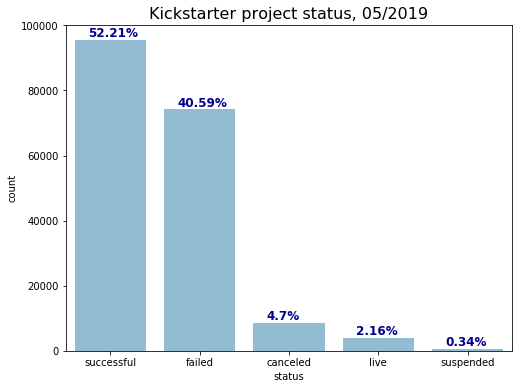

In [26]:
# style
base_color = sns.color_palette("Blues_r")[3]
plt.figure(figsize=[8,6])

# create ordering
order = master_df.status.value_counts().index

# plot
ax = sns.countplot(data=master_df, x='status', color=base_color, order=order);

# annotate
plt.title("Kickstarter project status, 05/2019", fontsize=16)
for p in ax.patches:
    ax.text(p.get_x()+0.15, p.get_height()+1000, str(round((p.get_height()/projects_unique)*100,2)) + '%', fontsize=12, color='darkblue', weight='bold')


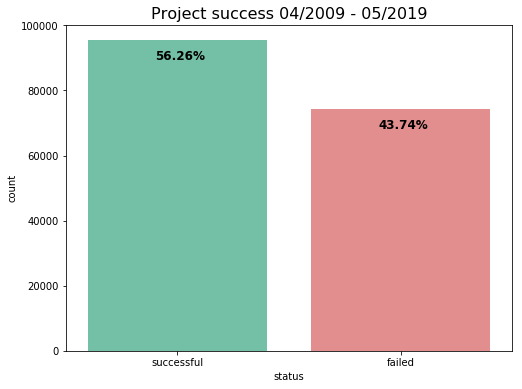

In [27]:
# style
cust_color = ["#66cdaa", "#f08080"]
plt.figure(figsize=[8,6])

# create ordering
order = ks_compl.status.value_counts().index

# plot
ax = sns.countplot(data=ks_compl, x='status', color=sns.set_palette(cust_color), order=order);

# annotate
plt.title("Project success 04/2009 - 05/2019", fontsize=16)
for p in ax.patches:
    ax.text(p.get_x()+0.3, p.get_height()-6000, str(round((p.get_height()/ n_compl_projects)*100,2)) + '%', fontsize=12, color='black', weight='bold')

### Categories and Subcategories

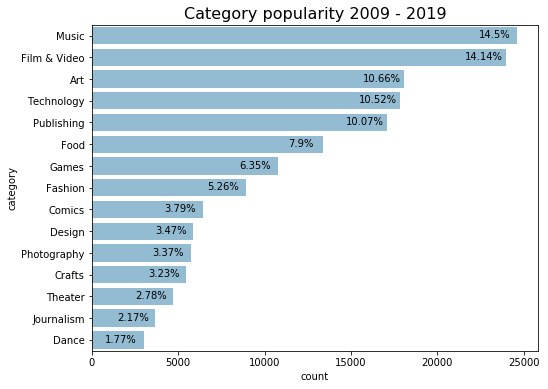

In [28]:
base_color = sns.color_palette("Blues_r")[3]
plt.figure(figsize=[8,6])

# create ordering
order = ks_compl.category.value_counts().index
cat_counts = ks_compl.category.value_counts()

# plot
ax = sns.countplot(data=ks_compl, y='category', color=base_color, order=order);

# annotate
plt.title("Category popularity 2009 - 2019", fontsize=16);
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count-1300, loc+0.1, cat_rate, ha='center', color="black")

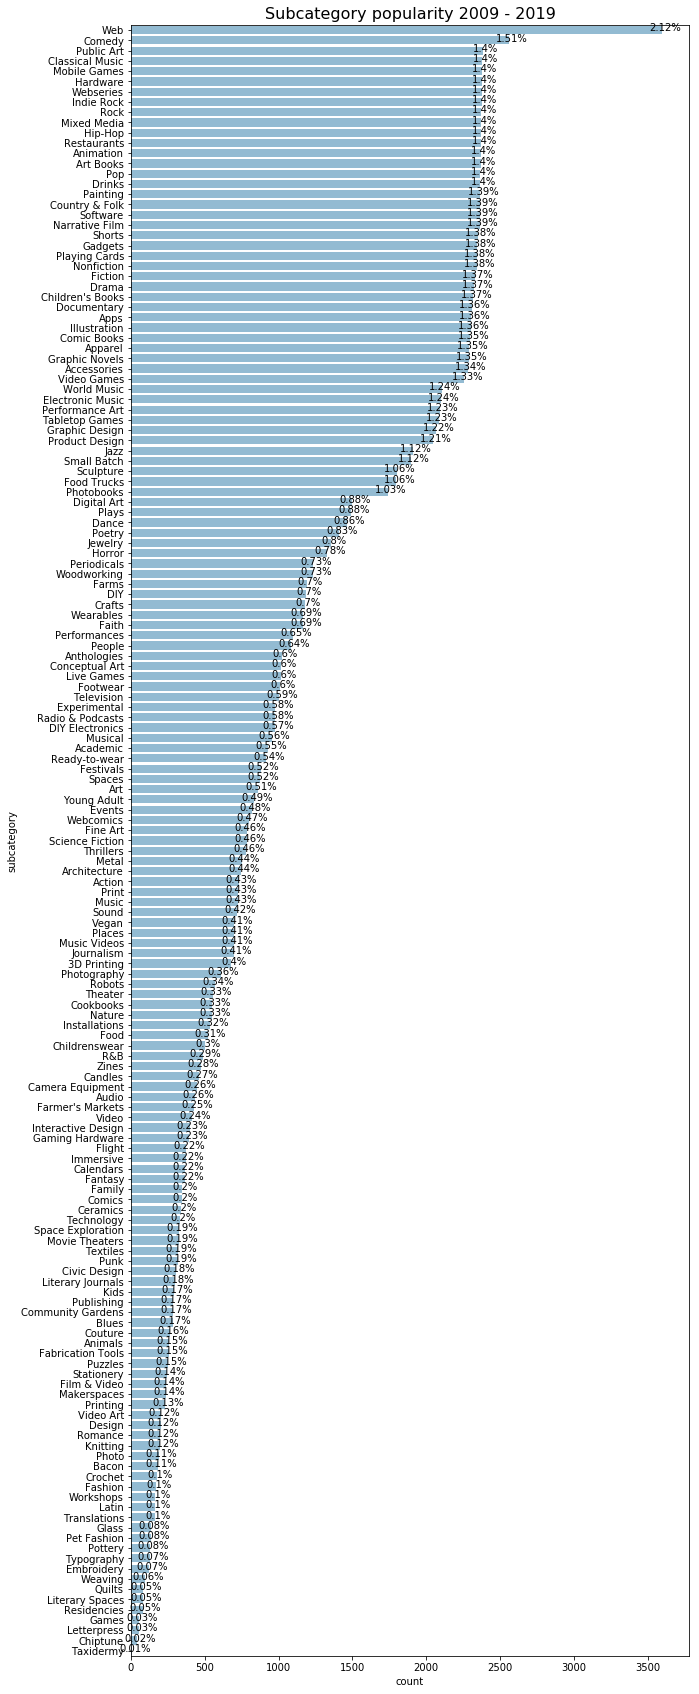

In [29]:
base_color = sns.color_palette("Blues_r")[3]
plt.figure(figsize=[10,30])

# create ordering
order = ks_compl.subcategory.value_counts().index
cat_counts = ks_compl.subcategory.value_counts()

# plot
ax = sns.countplot(data=ks_compl, y='subcategory', color=base_color, order=order);

# annotate
locs, labels = plt.yticks() 
plt.title("Subcategory popularity 2009 - 2019", fontsize=16);
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count+20, loc+0.1, cat_rate, ha='center', color="black")

### Subplots for subcategories of most popular categories

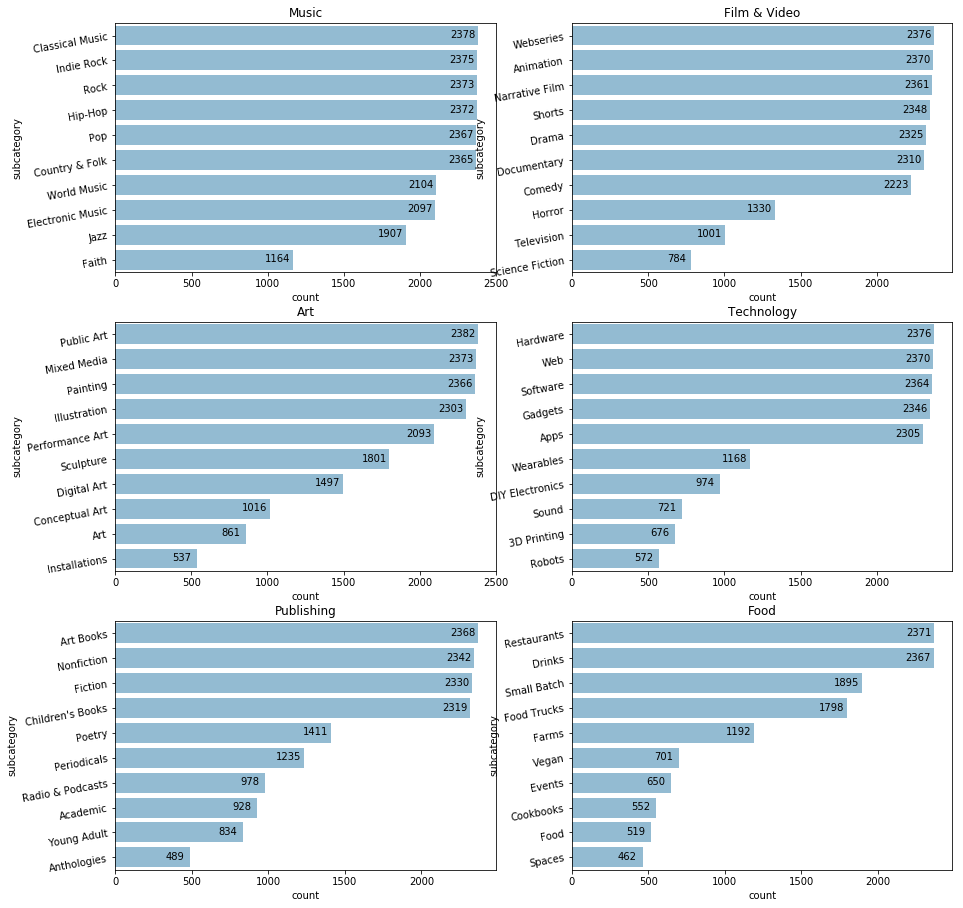

In [30]:
# Let's look at the most categories in depth
base_color = sns.color_palette("Blues_r")[3]
plt.figure(figsize=[15,12])

# take a look on most popular categories
pop_cat = ks_compl.category.value_counts().index
# # subplots
for i, cat in enumerate(pop_cat[:6]):
        ks_compl_cat = ks_compl.query('category == @cat')
        order = ks_compl_cat.subcategory.value_counts()[:10].index
        cat_counts = ks_compl_cat.subcategory.value_counts()
        plt.subplot(3, 2, i+1)
        plt.yticks(rotation=10)
        ax = sns.countplot(data=ks_compl_cat, y='subcategory', color=base_color, order=order);
        plt.subplots_adjust(bottom=-0.1)
        
        # annotate
        plt.title(f"{cat}")
        locs, labels = plt.yticks()
        for loc, label in zip(locs, labels):
            count = cat_counts[label.get_text()]
            plt.text(count-100, loc+0.1, count, ha='center', color="black")


### Goals

The goals of kickstarter projects have an extremely wide spread of project funding goals. They range between 0 to 150,000,000 USD (converted to hist. USD) with a standard deviation of more than 1.1 mi USD. The below 5 number summary describes the distribution of project goals.

In [31]:
ks_compl.goal_hist_usd.describe()

count   169,661.0           
mean    40,906.12771538828  
std     1,106,030.4164593664
min     0.01                
25%     1,500.0             
50%     5,000.0             
75%     13,193.87635772584  
max     150,099,318.94817606
Name: goal_hist_usd, dtype: float64

25% percent of the projects fall below a funding goal of USD 1,500. The funding median is at USD 5,000 and the third quartile marks at USD 13,194. Interestingly, the 4th quartile shows an extremely high quartile range:  150,099,300-13,194=150,086,106. Our data is heavily skewed to the right and we observe extreme outliers with funding goals of several millions.

In order to display how project goals are being chosen, I split projects into 4 groups. Due to the extremes, the quartiles are not ideal to display the distribution of project goals. Below I'm experimenting with goal ranges to get at understanding of the project goal distribution.  

In [32]:
# # get percentiles of goals, converted to USD 
goal_min = ks_compl.goal_hist_usd.min()
goal_25 = ks_compl.goal_hist_usd.quantile(q=0.25)
goal_50 = ks_compl.goal_hist_usd.quantile(q=0.5)
goal_75 = ks_compl.goal_hist_usd.quantile(q=0.75)
goal_95 = ks_compl.goal_hist_usd.quantile(q=0.95)
goal_extreme = ks_compl.goal_hist_usd.quantile(q=0.999)
goal_outliers = ks_compl.goal_hist_usd.quantile(q=0.9999)
goal_max = ks_compl.goal_hist_usd.max()

print(f"\
    - Min. goal: {goal_min} USD,\n\
    - 25% quartile - low goals: < {goal_25} USD,\n\
    - 50% quartile - medium goals: < {round(goal_50, 2)} USD,\n\
    - 75% quartile - moderately high goals: < {round(goal_75,2)} USD,\n\
    - 95% quartile - high goals < {round(goal_95,2)} USD,\n\
    - 99.9% percentile - very high goals: < {round(goal_extreme, 2)} USD,\n\
    - 99.99% percentile - extreme goals: < {round(goal_outliers, 2)} USD,\n\
    - Outliers: >= {round(goal_outliers, 2)} USD and <= {round(goal_max, 2)} USD") 

    - Min. goal: 0.01 USD,
    - 25% quartile - low goals: < 1500.0 USD,
    - 50% quartile - medium goals: < 5000.0 USD,
    - 75% quartile - moderately high goals: < 13193.88 USD,
    - 95% quartile - high goals < 65063.8 USD,
    - 99.9% percentile - very high goals: < 3129882.92 USD,
    - 99.99% percentile - extreme goals: < 55170000.0 USD,
    - Outliers: >= 55170000.0 USD and <= 150099318.95 USD


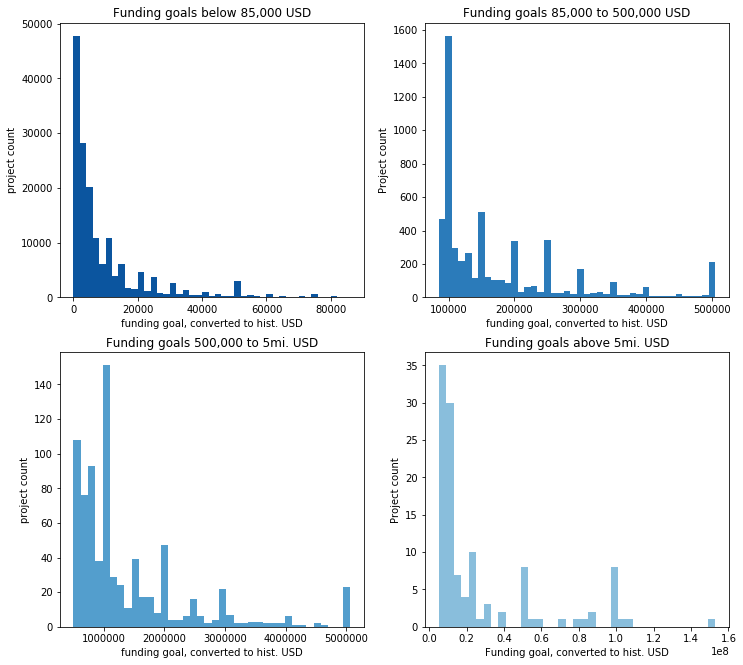

In [33]:
# style
plt.figure(figsize=[12,12])
base_color = sns.color_palette("Blues_r")

plt.subplot(3, 2, 1)
ks_compl_goal = ks_compl[ks_compl.goal_hist_usd < 85000]
bin_edges = np.arange(0, ks_compl_goal.goal_hist_usd.max()+2000, 2000)
plt.hist(data = ks_compl_goal, x = 'goal_hist_usd', bins = bin_edges, color=base_color[0])
plt.title("Funding goals below 85,000 USD")
plt.xlabel("funding goal, converted to hist. USD")
plt.ylabel("project count")
plt.subplots_adjust(bottom=-0.2)

plt.subplot(3, 2, 2)
ks_compl_goal = ks_compl.query('(goal_hist_usd >= 85000) & (goal_hist_usd < 500001)')
bin_edges = np.arange(85000, 500001+10000, 10000)
plt.hist(data = ks_compl_goal, x = 'goal_hist_usd', bins = bin_edges, color=base_color[1])
plt.title("Funding goals 85,000 to 500,000 USD")
plt.xlabel("funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.2)

plt.subplot(3, 2, 3)
ks_compl_goal = ks_compl.query('(goal_hist_usd >= 500001) & (goal_hist_usd < 5000001)')
bin_edges = np.arange(500001, 5000000+120000, 120000)
plt.hist(data = ks_compl_goal, x = 'goal_hist_usd', bins = bin_edges, color=base_color[2])
plt.title("Funding goals 500,000 to 5mi. USD")
plt.xlabel("funding goal, converted to hist. USD")
plt.ylabel("project count")

plt.subplot(3, 2, 4)
ks_compl_goal = ks_compl[ks_compl.goal_hist_usd >= 5000001]
bin_edges = np.arange(5000001, ks_compl.goal_hist_usd.max()+4000000, 4000000)
plt.hist(data = ks_compl_goal, x = 'goal_hist_usd', bins = bin_edges, color=base_color[3])
plt.title("Funding goals above 5mi. USD")
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.2)

plt.show()

In [34]:
# Bin observations into ordinal goal categories

bin_edges = [goal_min, goal_25, goal_50, goal_75, goal_95, goal_extreme, goal_outliers, goal_max]
bin_names = ['low', 'medium', 'moderately high', 'high', 'very high', 'extreme', 'outliers']

# # Creates goal_level column 
pd.set_option('mode.chained_assignment', None)
ks_compl['goal_level'] = pd.cut(ks_compl['goal_hist_usd'], bin_edges, labels=bin_names)
ks_compl.goal_level.value_counts()

medium             48853
low                43541
moderately high    34852
high               33931
very high          8313 
extreme            153  
outliers           17   
Name: goal_level, dtype: int64

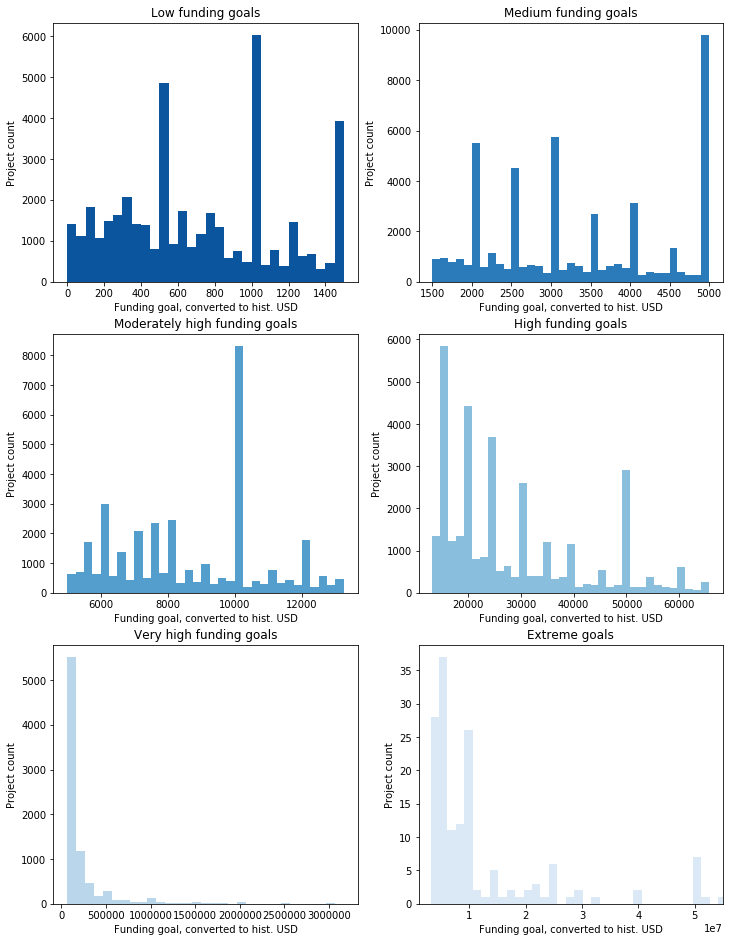

In [35]:
# style
plt.figure(figsize=[12,12])

# # low goal projects
plt.subplot(4, 2, 1)
ks_compl_goal_low = ks_compl[ks_compl.goal_level == "low"]
bin_edges_leveled = np.arange(0, ks_compl_goal_low.goal_hist_usd.max()+50, 50)
plt.hist(data = ks_compl_goal_low, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[0])
plt.title("Low funding goals")
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.3)

# medium goal projects
plt.subplot(4, 2, 2)
ks_compl_goal_medium = ks_compl[ks_compl.goal_level == "medium"]
bin_edges_leveled = np.arange(goal_25, ks_compl_goal_medium.goal_hist_usd.max()+100, 100)
plt.hist(data = ks_compl_goal_medium, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[1])
plt.title("Medium funding goals")
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.3)

# moderately high goal projects
plt.subplot(4, 2, 3)
ks_compl_goal_moderate = ks_compl[ks_compl.goal_level == "moderately high"]
bin_edges_leveled = np.arange(goal_50, ks_compl_goal_moderate.goal_hist_usd.max()+250, 250)
plt.hist(data = ks_compl_goal_moderate, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[2])
plt.title("Moderately high funding goals")
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.5)

# high goal projects
plt.subplot(4, 2, 4)
ks_compl_goal_high = ks_compl[ks_compl.goal_level == "high"]
bin_edges_leveled = np.arange(goal_75, ks_compl_goal_high.goal_hist_usd.max()+1500, 1500)
plt.hist(data = ks_compl_goal_high, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[3])
plt.title("High funding goals")
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.5)

# # very high goal projects
plt.subplot(4, 2, 5)
ks_compl_goal_very_high = ks_compl[ks_compl.goal_level == "very high"]
bin_edges_leveled = np.arange(goal_95, ks_compl_goal_very_high.goal_hist_usd.max()+100000, 100000)
plt.hist(data = ks_compl_goal_very_high, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[4])
plt.title("Very high funding goals")
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.5)

# extreme goal projects
plt.subplot(4, 2, 6)
ks_compl_goal_extreme = ks_compl[ks_compl.goal_level == "extreme"]
bin_edges_leveled = np.arange(goal_extreme, ks_compl_goal_extreme.goal_hist_usd.max()+1500000, 1500000)
plt.hist(data = ks_compl_goal_extreme, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[5])
plt.title("Extreme goals")
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.5)
plt.xlim(1000000, 55000000) # treat values above 55,000,000 like outliers


plt.show()

The funding goal distribution is heavily skewed to the right with multi modal peaks. We experience string outliers at the high end of funding goals. Due to the very strong right tail and to improve readability of the above graphs, I limited the graphs to goals under 55mi. Let's find out what the most successful projects were.

In [36]:
ks_compl[ks_compl.goal_level == "outliers"]['status'].value_counts()

failed    17
Name: status, dtype: int64

In [37]:
ks_compl[ks_compl.goal_level == "extreme"]['status'].value_counts()

failed    153
Name: status, dtype: int64

There were no fundings successful for projects in of the extreme/outlier goal category.Let's narrow it down and identify goal of the most successful project. 

In [38]:
# most successful projects
ks_compl_goal_very_high[ks_compl_goal_very_high.status == "successful"].sort_values(by=['goal_hist_usd'], ascending=False)[:5]


,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,...,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd),goal_level
154071,57628,The Veronica Mars Movie Project,https://www.kickstarter.com/projects/559914737/the-veronica-mars-movie-project,UPDATED: This is it. We're making a Veronica Mars movie! Now the only question is: how big can we make it? We need your help!,Film & Video,Narrative Film,https://ksr-ugc.imgix.net/assets/011/303/414/9e0a1fd046b781883cc111d25165670e_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463680699&auto=format&frame=1&q=92&s=ef33507de02f20b6a37c5da463e95748,the-veronica-mars-movie-project,2011-11-04 22:08:00,2013-03-13 14:42:22,...,USD,"2,000,000.0","2,000,000.0","2,000,000.0","5,702,153.38","5,702,153.38","5,702,153.38",1.0,1.0,very high
88429,2193016,Bring Back MYSTERY SCIENCE THEATER 3000,https://www.kickstarter.com/projects/mst3k/bringbackmst3k,"Almost there! MYSTERY SCIENCE THEATER 3000 will return... and if we can get to $5.9MM, we'll get THIRTEEN new episodes of MST3K!",Film & Video,Television,https://ksr-ugc.imgix.net/assets/012/289/124/ae6179e0455878652460b3f70d7550d0_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463751640&auto=format&frame=1&q=92&s=4ae4a3ae1624e155a466d650a2865b6d,bringbackmst3k,2015-10-25 22:07:19,2015-11-10 15:49:32,...,USD,"2,000,000.0","2,000,000.0","2,000,000.0","5,764,229.38","5,764,229.38","5,764,229.38",1.0,1.0,very high
152759,541556,WISH I WAS HERE,https://www.kickstarter.com/projects/1869987317/wish-i-was-here-1,"""Hell, there are no rules here - we're trying to accomplish something."" - Thomas A. Edison",Film & Video,Narrative Film,https://ksr-ugc.imgix.net/assets/011/511/086/80b9bd751c8ab25337c418512a70bfc6_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463683792&auto=format&frame=1&q=92&s=70372b695687467e820e2b6f5ce3b83d,wish-i-was-here-1,2013-04-19 19:35:41,2013-04-24 09:57:04,...,USD,"2,000,000.0","2,000,000.0","2,000,000.0","3,105,473.1","3,105,473.1","3,105,473.1",1.0,1.0,very high
101573,1935067,Shenmue 3,https://www.kickstarter.com/projects/ysnet/shenmue-3,Yu Suzuki presents the long awaited third installment in the Shenmue series.,Games,Video Games,https://ksr-ugc.imgix.net/assets/012/155/905/cc709c4441634e62db1d28d44ad6d8a8_original.png?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463738901&auto=format&frame=1&q=92&s=127e129ca05dca801d7afa4ce5a51a93,shenmue-3,2015-06-02 09:43:28,2015-06-16 01:51:04,...,USD,"2,000,000.0","2,000,000.0","2,000,000.0","6,333,295.77","6,333,295.77","6,333,295.77",1.0,1.0,very high
141600,941714,Blue Mountain State: The Movie,https://www.kickstarter.com/projects/773106364/blue-mountain-state-the-movie,"An epic, outrageous, feature length comedy based on the popular TV series.",Film & Video,Narrative Film,https://ksr-ugc.imgix.net/assets/011/671/809/35b901e743f566d58efb372b10952efa_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463686587&auto=format&frame=1&q=92&s=293e7998e7dec07bd88dd951bcffd021,blue-mountain-state-the-movie,2014-03-23 03:32:53,2014-04-15 12:43:13,...,USD,"1,500,000.0","1,500,000.0","1,500,000.0","1,911,827.41","1,911,827.41","1,911,827.41",1.0,1.0,very high


The 4 most successful projects had a funding goal of 2mi. The video game 'Shenmue 3" raised 6.33mi USD and therefore is the most successful project in the Kickstarter history. https://www.kickstarter.com/projects/ysnet/shenmue-3

Nevertheless, if we plot goals below 65,000 we're able to depict the overall trend towards higher project goals. Projects with lower goals are by far more common than higher goal projects.     

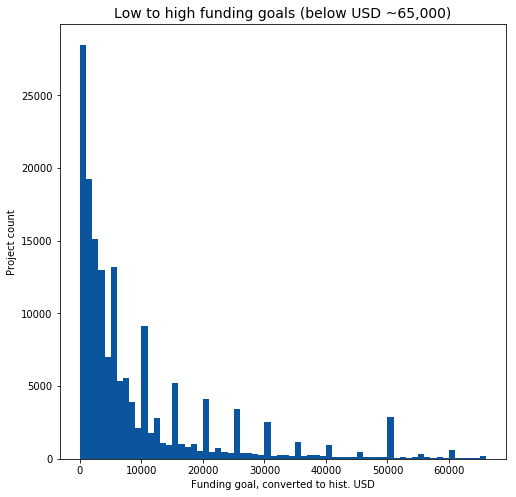

In [39]:
# # style
plt.figure(figsize=[8,8])

# # low goal projects
ks_compl_goal_95 = ks_compl[ks_compl.goal_hist_usd < goal_95]
bin_edges_leveled = np.arange(0, ks_compl_goal_95.goal_hist_usd.max()+1000, 1000)
plt.hist(data = ks_compl_goal_95, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[0]);
plt.title("Low to high funding goals (below USD ~65,000)", fontsize=14)
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.show()

Above, we linearly plot normally distributed data with a strong right skew, we'd would receive a wide bin on the left, the bins would get thinner to the right. It makes sense use a log scale to get a better impression of our data. However, the strong multimodal peaks caught my interest. Let's identify local peaks below.

In [40]:
# find local peaks
ks_goal_leveled = [ks_compl_goal_low, ks_compl_goal_medium, 
                   ks_compl_goal_moderate, ks_compl_goal_high, ks_compl_goal_very_high, 
                   ks_compl_goal_extreme]

for name, df in zip(bin_names, ks_goal_leveled):
    frequencies = df.goal_hist_usd.value_counts().index[:5]
    freq_counts = df.goal_hist_usd.value_counts().values[:5]
    print(f"\nFrequency peaks of {name} goal projects:")
    for i in range(5): print(f"USD {round(frequencies[i], 2)}, count: {freq_counts[i]}")



Frequency peaks of low goal projects:
USD 1000.0, count: 5735
USD 500.0, count: 4275
USD 1500.0, count: 3592
USD 300.0, count: 1288
USD 1200.0, count: 1134

Frequency peaks of medium goal projects:
USD 5000.0, count: 9534
USD 3000.0, count: 5338
USD 2000.0, count: 5112
USD 2500.0, count: 4062
USD 4000.0, count: 2854

Frequency peaks of moderately high goal projects:
USD 10000.0, count: 8080
USD 6000.0, count: 2508
USD 8000.0, count: 2093
USD 7000.0, count: 1628
USD 7500.0, count: 1621

Frequency peaks of high goal projects:
USD 15000.0, count: 4426
USD 20000.0, count: 3826
USD 25000.0, count: 3165
USD 50000.0, count: 2782
USD 30000.0, count: 2301

Frequency peaks of very high goal projects:
USD 100000.0, count: 1266
USD 75000.0, count: 585
USD 150000.0, count: 410
USD 250000.0, count: 319
USD 200000.0, count: 277

Frequency peaks of extreme goal projects:
USD 10000000.0, count: 25
USD 5000000.0, count: 22
USD 50000000.0, count: 6
USD 25000000.0, count: 5
USD 4000000.0, count: 5


Plot log scale.

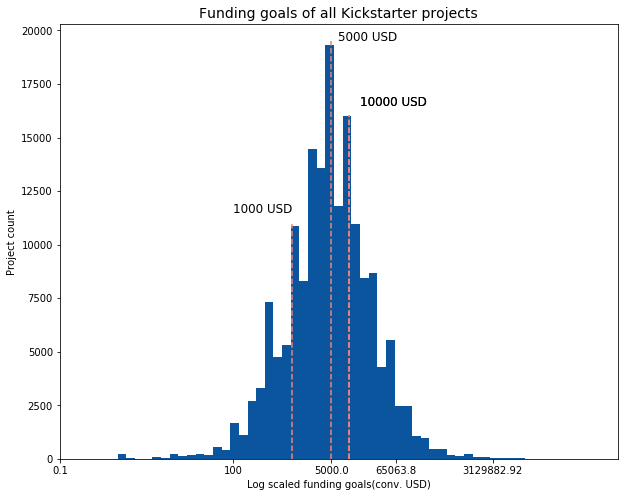

In [41]:
# # style
plt.figure(figsize=[10,8])

# # low goal projects
log_data = np.log10(ks_compl.goal_hist_usd)
log_bin_edges = np.arange(0, log_data.max()+0.15, 0.15)
plt.hist(log_data, bins = log_bin_edges, color=base_color[0]);

# annotations
tick_locs = [0.1, 100, goal_50, round(goal_95,2), round(goal_extreme,2)]
plt.xticks(np.log10(tick_locs),tick_locs)
peaks = ks_compl.goal_hist_usd.value_counts().index[:3]
log_peaks = [np.log10(peak) for peak in peaks]
texts = [str(round(peak)) + " USD" for peak in peaks]
ax = plt.gca()

# 5000 peak
ax.axvline(x=log_peaks[0], color='salmon', ymax=0.96, linestyle="dashed") # ymin=0.95, ymax=0.96
ax.annotate(texts[0], xy=(log_peaks[0]+0.11, 19500),fontsize=12)

# 10 000 peak
ax.axvline(x=log_peaks[1], color='salmon', ymax=0.79, linestyle="dashed") # ymin=0.98, ymax=0.9,
ax.annotate(texts[1], xy=(log_peaks[0]+0.5, 16500),fontsize=12)

# 10 000 peak
ax.axvline(x=log_peaks[1], color='salmon', ymax=0.79, linestyle="dashed") # ymin=0.98, ymax=0.9,
ax.annotate(texts[1], xy=(log_peaks[0]+0.5, 16500),fontsize=12)

# 1000 peak
ax.axvline(x=log_peaks[2]+0.01999, color='salmon', ymax=0.539, linestyle="dashed") # ymin=0.98, ymax=0.9,
ax.annotate(texts[2], xy=(log_peaks[2]-1, 11500),fontsize=12)

plt.title("Funding goals of all Kickstarter projects", fontsize=14)
plt.xlabel('Log scaled funding goals(conv. USD)')
plt.ylabel("Project count")
plt.show()

When we use a log scale, we actually find a normal distribution of project goals.

# Bivariate explorations

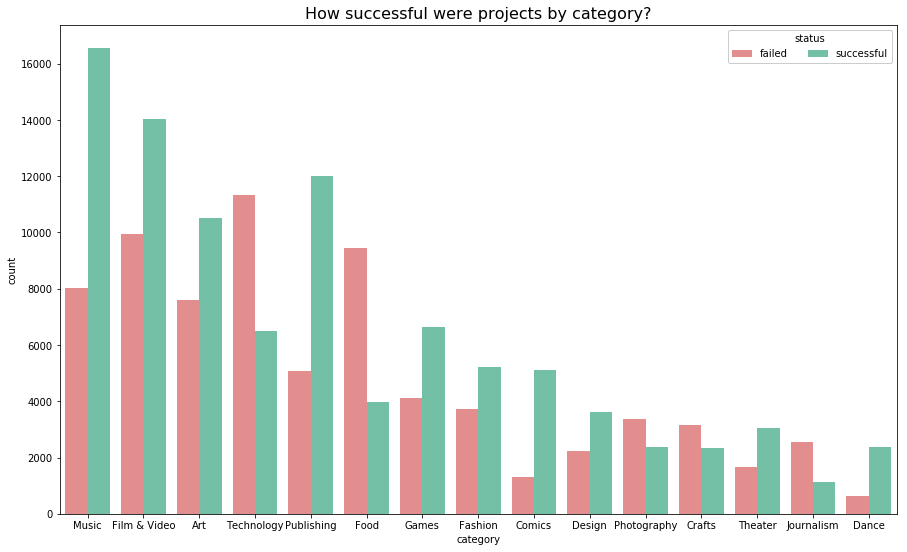

In [42]:
# find out what project categories are success predictors
plt.figure(figsize=[15,9])
cust_color = ["#f08080", "#66cdaa"]
# clustered bar chart qualitative vs qualitative

# seaborn countplot
ax = sns.countplot(data = ks_compl, x = 'category', hue = 'status', color = sns.set_palette(cust_color), order=ks_compl.category.value_counts().index)

# reset legend to avoid overlap
ax.legend(loc = 'upper right', ncol = 3, framealpha = 1, title = 'status')

# annotate
plt.title("How successful were projects by category?", fontsize=16);

As we visualize absolute values above, we may misinterpret the actual success rates. In the graph below, we calculate relative frequencies for each category.  

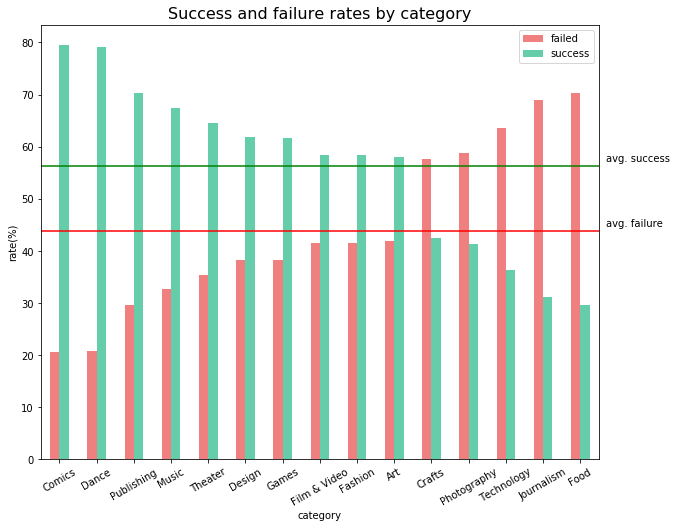

In [43]:
pop_cats = ks_compl.category.value_counts().index
cat_counts = ks_compl.category.value_counts()

# calculate success and failure rates
def calc_rate(category, status):
    cat_df = ks_compl[ks_compl.category == category]
    cat_len = len(cat_df)
    cat_status_len = len(cat_df[cat_df.status == status])
    return (cat_status_len / cat_len) * 100 

cat_success = [calc_rate(cat,"successful") for cat in pop_cats]
cat_failed = [calc_rate(cat,"failed") for cat in pop_cats]

# create a new dataframe based success and failure rates
df = pd.DataFrame({'failed': cat_failed, 'success': cat_success,}, index=pop_cats)

# order by success rates
df.sort_values(by=['success'], ascending=False, inplace=True)

# plot
ax = df.plot.bar(rot=30, figsize=(10,8));

# plot means
plt.axhline(p_compl_success*100, color='g')
plt.axhline(p_compl_fail*100, color='r')

# annotate
plt.title("Success and failure rates by category", fontsize=16);
plt.text(14.7, p_compl_success*100+1, "avg. success")
plt.text(14.7, p_compl_fail*100+1, "avg. failure")
plt.ylabel("rate(%)")
plt.xlabel("category")
plt.show()

violin plot for project status (categorical )vs. goal (quantitative). I may try a faceted approach for our different categories.

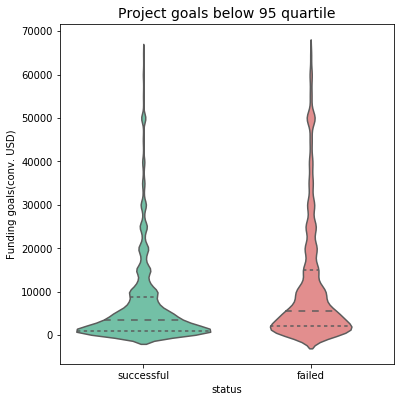

In [44]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)
# plot

df = ks_compl[ks_compl.goal_hist_usd < goal_95]
ax = sns.violinplot(data = df, x = 'status', y = 'goal_hist_usd', 
                    order=['successful', 'failed'], color = color, 
                    inner='quartile')
#annotate
plt.title("Project goals below 95 quartile", fontsize=14 )
plt.ylabel('Funding goals(conv. USD)')
plt.subplots_adjust(bottom=-0.3)
plt.show()

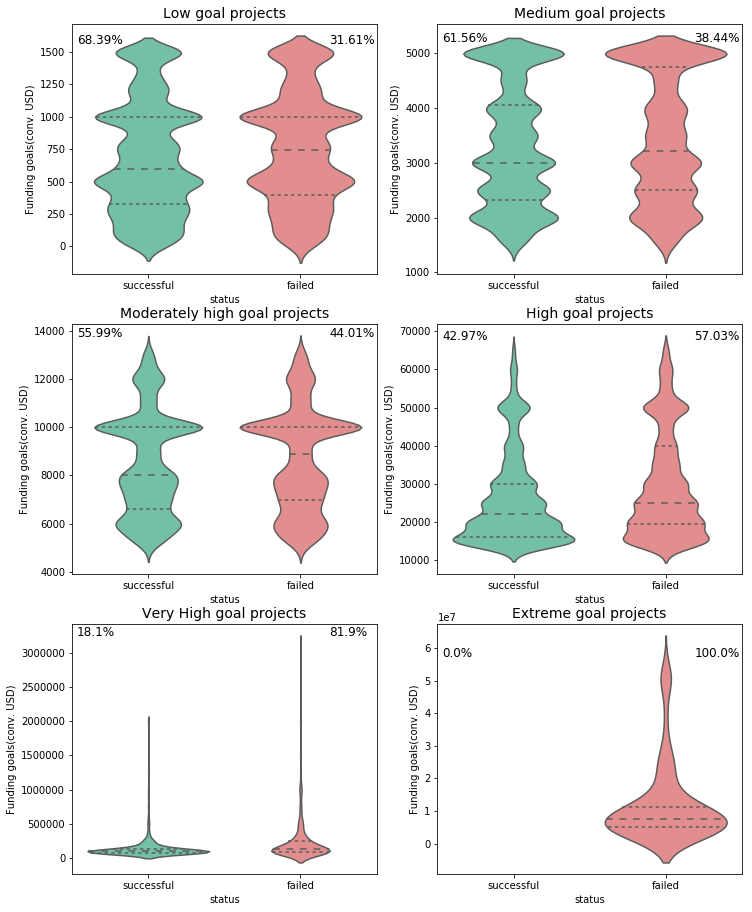

In [45]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)
plt.figure(figsize=[12,10])

# ks_compl_goal_extreme = ks_compl_goal_extreme
ks_goal_leveled = [ks_compl_goal_low, ks_compl_goal_medium, 
                   ks_compl_goal_moderate, ks_compl_goal_high, ks_compl_goal_very_high, 
                   ks_compl_goal_extreme]

# low goal projects
texts = ["Low", "Medium", "Moderately high", "High", "Very High", "Extreme"]
for i, df in enumerate(ks_goal_leveled):
    # plot
    plt.subplot(3, 2, i+1)
    ax = sns.violinplot(data = df, x = 'status', y = 'goal_hist_usd', 
               order=['successful', 'failed'], color = color, inner='quartile')
    # calculate success rates
    p_failed_goal = len(df[df.status == "failed"])* 100 / len(df)
    p_success_goal = 100 - p_failed_goal
    
    #annotate
    ax.annotate(str(round(p_failed_goal,2)) + "%", xy=(1.19, df.goal_hist_usd.max()*1.04), fontsize=12)
    ax.annotate(str(round(p_success_goal,2)) + "%", xy=(-0.47, df.goal_hist_usd.max()*1.04), fontsize=12)
    plt.title(texts[i]+" goal projects", fontsize=14 )
    plt.ylabel('Funding goals(conv. USD)')
    plt.subplots_adjust(bottom=-0.3)
plt.show()

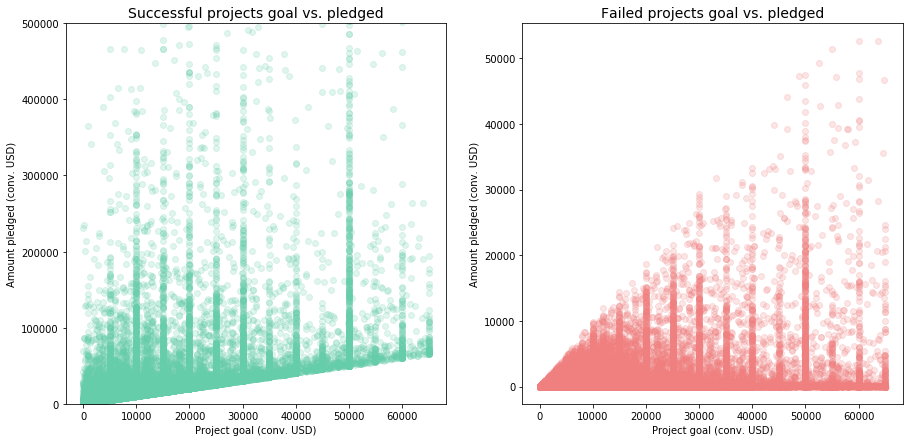

In [97]:
plt.figure(figsize=[15,7])

# def log_trans(x, inverse = False):
#     if not inverse:
#         return np.log10(x)
#     else:
#         return np.power(10, x)
ks_compl_success = ks_compl[ks_compl.status == "successful"]
ks_compl_fail = ks_compl[ks_compl.status == "failed"]
ks_compl_success_95 = ks_compl_success[ks_compl_success.goal_hist_usd < goal_95]
ks_compl_fail_95 = ks_compl_fail[ks_compl_fail.goal_hist_usd < goal_95]

plt.subplot(1, 2, 1)
sns.regplot(ks_compl_success_95.goal_hist_usd, ks_compl_success_95.pledged_hist_usd, 
            scatter_kws = {'alpha' : 1/5}, fit_reg=False);
plt.ylim(0, 500000)
plt.title("Successful projects goal vs. pledged", fontsize=14)
plt.ylabel("Amount pledged (conv. USD)")
plt.xlabel("Project goal (conv. USD)")
# tick_locs = [10, 100, 1000, 10000, 50000]
# plt.yticks(log_trans(tick_locs), tick_locs)

plt.subplot(1, 2, 2)
sns.regplot(ks_compl_fail_95.goal_hist_usd, ks_compl_fail_95.pledged_hist_usd, 
            scatter_kws = {'alpha' : 1/5}, color="#f08080", fit_reg=False);
plt.title("Failed projects goal vs. pledged", fontsize=14)
plt.ylabel("Amount pledged (conv. USD)")
plt.xlabel("Project goal (conv. USD)")
# tick_locs = [0.1, 5, 100, 1000]
# plt.yticks(log_trans(tick_locs), tick_locs)


plt.show()


In [52]:
# calculate differences between goal and pledged
ks_compl['goal_pledged_diff_r'] = abs((ks_compl['pledged_hist_usd'] - ks_compl['goal_hist_usd'])*100 / ks_compl['goal_hist_usd'])
ks_compl[['goal_pledged_diff_r','pledged_hist_usd','goal_hist_usd', 'status']].sample(10)

,goal_pledged_diff_r,pledged_hist_usd,goal_hist_usd,status
165346,99.08,46.0,"5,000.0",failed
47537,92.32,192.0,"2,500.0",failed
73193,133.21535000000006,"61,459.826073420125","26,353.2507930632",successful
131898,41.19999999999998,"2,364.329101148604","1,674.4540376406546",successful
139045,88.68666666666667,"1,697.0","15,000.0",failed
44920,71.71186440677965,"8,074.900545725746","4,702.58742668857",successful
7996,62.45634819748819,"23,720.35598961156","14,601.064379938038",successful
54013,87.5,375.0,200.0,successful
115198,86.94285714285714,"4,570.0","35,000.0",failed
139716,100.0,0.0,"7,156.062696336451",failed


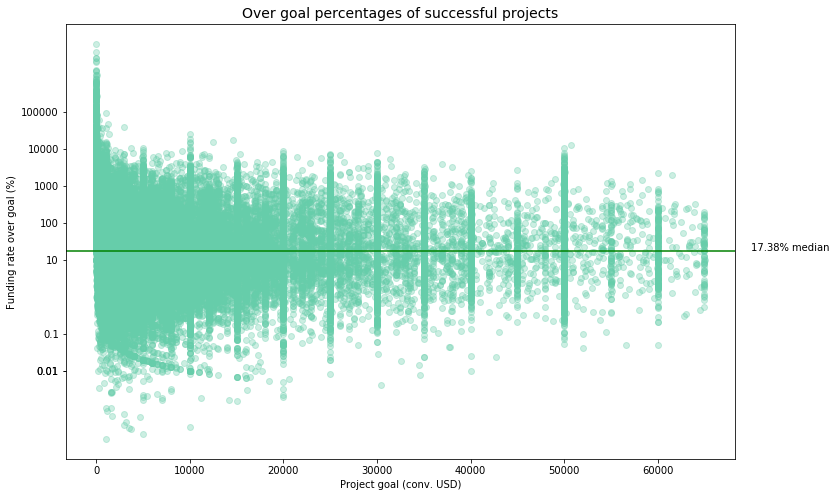

In [105]:
# goal vs. pledged
plt.figure(figsize=[12,8])

def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

ks_compl_success = ks_compl[ks_compl.status == "successful"]
ks_compl_success_95 = ks_compl_success[ks_compl_success.goal_hist_usd < goal_95 ]
sns.regplot(ks_compl_success_95.goal_hist_usd, ks_compl_success_95.goal_pledged_diff_r.apply(log_trans), 
            scatter_kws = {'alpha' : 1/3}, fit_reg=False);
over_goal_r = round(log_trans(ks_compl_success_95.goal_pledged_diff_r.median()),2)
plt.axhline(over_goal_r, color='green')

tick_locs = [0.01, 0.01, 0.1, 10, 100, 1000, 10000, 100000]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.title("Above goal funding rates of successful projects", fontsize=14)
plt.text(70000, over_goal_r, str(round(log_trans(over_goal_r, inverse=True),2)) + "% median")
plt.xlabel("Project goal (conv. USD)")
plt.ylabel("Funding rate over goal (%)")


plt.show()

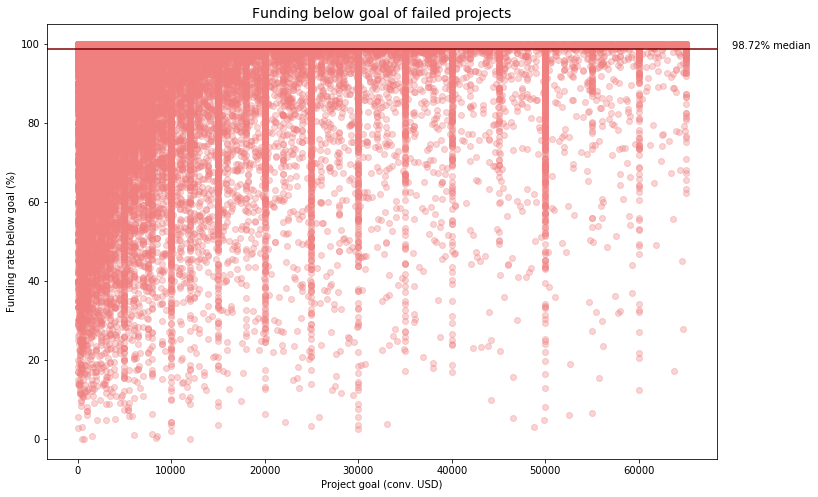

In [118]:
# goal vs. pledged
plt.figure(figsize=[12,8])

ks_compl_fail = ks_compl[ks_compl.status == "failed"]
ks_compl_fail_95 = ks_compl_fail[ks_compl_fail.goal_hist_usd < goal_95 ]
sns.regplot(ks_compl_fail_95.goal_hist_usd, ks_compl_fail_95.goal_pledged_diff_r, 
            scatter_kws = {'alpha' : 1/3}, fit_reg=False, color="#f08080");
below_goal_r = round(ks_compl_fail_95.goal_pledged_diff_r.median(),2)

plt.axhline(under_goal_r, color='maroon')

plt.title("Funding below goal of failed projects", fontsize=14)
plt.text(70000, below_goal_r, str(under_goal_r) + "% median")
plt.xlabel("Project goal (conv. USD)")
plt.ylabel("Funding rate below goal (%)")
plt.show()

What are predictors of a project's failure and success?  
Why are projects usually canceled or suspended?  
What type of tech projects work in Kickstarter?  